## 루브릭
|평가문항|상세기준|self check|
|:-------|:-------|:-----------------------|
|1. 필수 문제 세 가지를 해결하였는가?|데이터 전처리 방법과 시각화 도구를 사용하여, 문제에서 제시된 요구사항들을 모두 만족했는가?|OK|
|2. 프로젝트를 통해 해결하고 싶은 문제를 정의하였는가?|제공된 데이터에서 문제 해결에 필요한 부분을 선별해냈고, 이를 확인하기 위해 적절한 형태로 전처리했는가?|OK|
|3. 내가 정의한 문제 해결 시도와 결과|스스로 정의한 문제에 대해 적절한 해결 시도를 하고 결과를 도출해냈는가?.|OK|


## 학습목표
* 기업이 처한 상황을 인식하고 문제를 정의
* 문제를 해결하기 위해 필요한 데이터를 인지하고 이해
* 적절한 분석 기법을 적용해 문제를 해결

## 1. 상황인식

> "모두 스터디카페"의 데이터를 분석하여 더 잘 되기위한 운영 전략을 제시 


1. 제공되는 data
  * entry_data: '모두 스터디카페'의 시간별 입장 기록 데이터  
  * sales_data: '모두 스터디카페'의 시간별 음식/음료 판매 데이터  
  * item_data: '모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격  
  * item_entry_data: '모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격 
2. 아래 내용에 대한 시각화 포함
  * 월별 매출액 추세  
  * 가장 인기있는 음식/음료  
  * 가장 많이 팔린 입장권 종류  

## 2. 문제 정의

### 2-1 핵심 문제

> 핵심문제 : 모두카페의 상태는 어떤가?
>  * 월별 매출액 추세  
>  * 가장 인기있는 음식/음료   
>  * 가장 많이 팔린 입장권 종류  

### 2-2 내가 정한 문제

> 문제 정의 : 단골 고객 확보를 위해서 어떻게 해야 할까?  
>             단골 고객 대상으로 선호, 비선호 음식/음료를 조사하여 메뉴 개선  
>  * 단골 고객이 선호하는 음식(단골 고객이 많이 주문한 음식/음료)
>  * 단골 고객이 한번만 주문한 음식/음료(단골 고객이 선호하지 않는 음식)

## 3 데이터 분석

### 3-1 데이터 불러오기 

In [1]:
# 필요 라이브러리 호출하기
# Pandas, Numpy, Matplotlib, Seaborn을 호출해봅니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image

In [2]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
# entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')

entry_data = pd.read_csv('./entry_data.csv')
sales_data = pd.read_csv('./sales_data.csv')
item_data = pd.read_csv('./item_data.csv')
item_entry_data = pd.read_csv('./item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data
entry_data['고객'].value_counts()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


customer666446    168
customer440840    150
customer338849    142
customer258946    138
customer667032    101
                 ... 
customer571779      1
customer573555      1
customer760674      1
customer416215      1
customer375764      1
Name: 고객, Length: 5404, dtype: int64

In [4]:
# sales_data 데이터 정보 확인하기
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [5]:
sales_data['결제방식'].value_counts()

신용카드    6609
현금       496
Name: 결제방식, dtype: int64

In [6]:
sales_data['비고'].value_counts()

결제완료    6945
판매취소     109
결제취소      51
Name: 비고, dtype: int64

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB


In [8]:
# item_data 데이터 정보 확인하기
item_data
item_data['분류'].value_counts()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


음식            60
차가운음료(커피외)    34
커피            29
스무디&쉐이크       19
따뜻한음료(커피외)    16
디저트           12
포장             3
게임&TV          1
Name: 분류, dtype: int64

In [9]:
# item_entry_data 데이터 정보 확인하기
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


## 3-2 데이터 분석하기 

* **필수 문제1 : 월별 매출액 추세(sales_data)**  
월별 매출액 추세를 집계하고 그 결과를 시각화  
hint : groupby()


In [10]:
temp_var = sales_data
temp_var['date'] = sales_data['결제일시'].str[:7]
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',','')
temp_var['payment'] = pd.to_numeric(sales_data['결제금액'])
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   결제일시     7105 non-null   object
 1   판매위치     7105 non-null   object
 2   상품명      7105 non-null   object
 3   결제방식     7105 non-null   object
 4   비고       7105 non-null   object
 5   판매수량     7105 non-null   int64 
 6   결제금액     7105 non-null   object
 7   고객       6300 non-null   object
 8   date     7105 non-null   object
 9   payment  7105 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 555.2+ KB


In [11]:
grouped = temp_var.groupby(by='date')['payment'].sum()
grouped.index
grouped.values

Index(['2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04'],
      dtype='object', name='date')

array([   7000, 2104500, 3116600, 2537000, 3621500, 1215000, 1229000,
       1197500, 2138500, 2748500, 3290000, 1430500, 1181500, 1870900,
         49900], dtype=int64)

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, '월별 매출액')

Text(0.5, 0, 'month')

Text(0, 0.5, 'payment')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2021-02'),
  Text(1, 0, '2021-03'),
  Text(2, 0, '2021-04'),
  Text(3, 0, '2021-05'),
  Text(4, 0, '2021-06'),
  Text(5, 0, '2021-07'),
  Text(6, 0, '2021-08'),
  Text(7, 0, '2021-09'),
  Text(8, 0, '2021-10'),
  Text(9, 0, '2021-11'),
  Text(10, 0, '2021-12'),
  Text(11, 0, '2022-01'),
  Text(12, 0, '2022-02'),
  Text(13, 0, '2022-03'),
  Text(14, 0, '2022-04')])

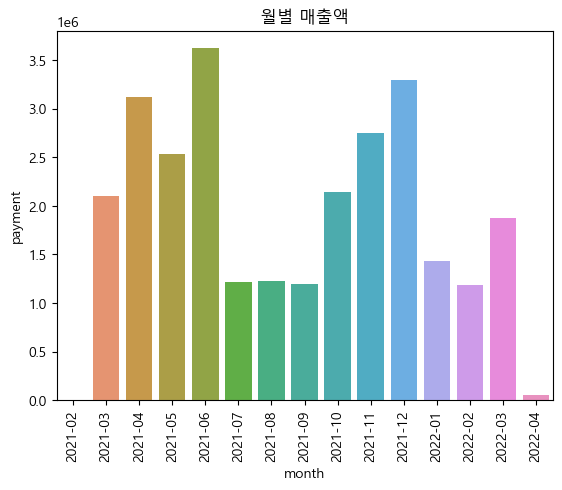

In [12]:
sns.barplot(x=grouped.index,y=grouped.values)
plt.title('월별 매출액')
plt.xlabel('month')
plt.ylabel('payment')
plt.xticks(rotation=90)
plt.show()

* **필수문제2: 가장 인기있는 음식/음료(sales_data)**  
여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화  
힌트: value_counts()


In [13]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
mask_1 = temp_var['판매수량'] != -1
count = temp_var[mask_1]['상품명'].value_counts().sort_values(ascending=False)
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
top10 = pd.DataFrame(count.nlargest(10)).reset_index()
top10.columns = ['상품명','판매량']
top10

,상품명,판매량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


<AxesSubplot:xlabel='상품명', ylabel='판매량'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '김치볶음밥'),
  Text(1, 0, '라면'),
  Text(2, 0, '짜장라면'),
  Text(3, 0, '치즈불고기볶음밥'),
  Text(4, 0, '계란추가'),
  Text(5, 0, '낙지볶음밥'),
  Text(6, 0, '새우볶음밥'),
  Text(7, 0, '아메리카노(ICE)'),
  Text(8, 0, '치즈감자튀김'),
  Text(9, 0, '감자튀김')])

Text(0.5, 1.0, '판매아이템별 상위10개 판매량')

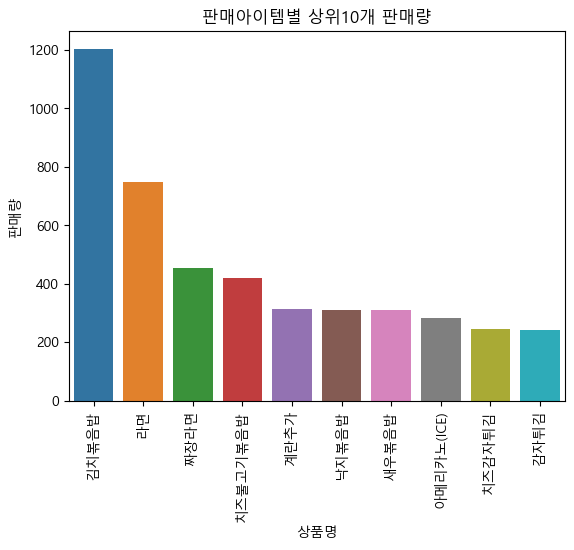

In [14]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
plt.rc('font',family='Malgun Gothic')
# 집계 결과를 시각화하기
sns.barplot(x=top10['상품명'],y=top10['판매량'])
plt.xticks(rotation=90)
plt.title('판매아이템별 상위10개 판매량')


* **필수문제2: 가장 인기있는 음식/음료(sales_data)**  
여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.  
힌트: value_counts() 함수를 사용하세요.

In [15]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
mask_1 = temp_var['판매수량'] != -1
item_payment =temp_var[mask_1].groupby('상품명')['payment'].sum()
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
top10 = item_payment.sort_values(ascending=False).nlargest(10)
top10 = pd.DataFrame(top10).reset_index()
top10.columns = ['상품명','판매금액']
top10

,상품명,판매금액
0,김치볶음밥,6004400
1,라면,2941500
2,치즈불고기볶음밥,2292600
3,짜장라면,2038500
4,낙지볶음밥,1710700
5,새우볶음밥,1539800
6,치즈감자튀김,1354200
7,감자튀김,1083800
8,아메리카노(ICE),1058100
9,불닭볶음면,693000


<AxesSubplot:xlabel='상품명', ylabel='판매금액'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '김치볶음밥'),
  Text(1, 0, '라면'),
  Text(2, 0, '치즈불고기볶음밥'),
  Text(3, 0, '짜장라면'),
  Text(4, 0, '낙지볶음밥'),
  Text(5, 0, '새우볶음밥'),
  Text(6, 0, '치즈감자튀김'),
  Text(7, 0, '감자튀김'),
  Text(8, 0, '아메리카노(ICE)'),
  Text(9, 0, '불닭볶음면')])

Text(0.5, 1.0, '판매아이템별 상위10개 판매금액')

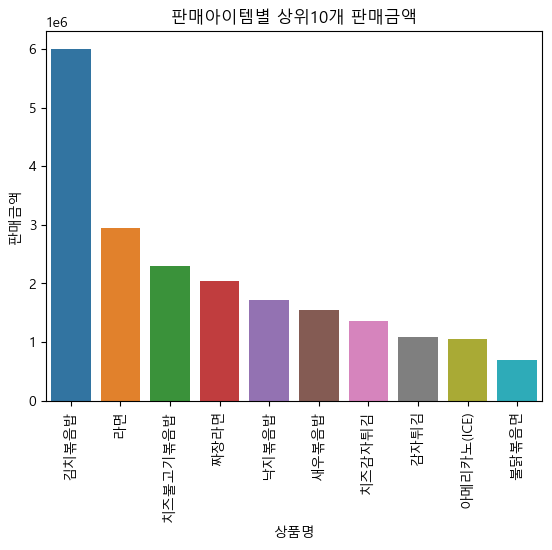

In [16]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
plt.rc('font',family='Malgun Gothic')
# 집계 결과를 시각화하기
sns.barplot(x=top10['상품명'],y=top10['판매금액'])
plt.xticks(rotation=90)
plt.title('판매아이템별 상위10개 판매금액')

* **필수 문제3: 가장 많이 팔린 입장권 종류(entry_data)**  
여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화  
힌트: value_counts() 함수를 사용하세요.

In [17]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var.info()
temp_var
# temp_var의 금액을 요금제명을 기준으로 집계하기
grouped = temp_var.groupby('요금제명')['금액'].sum()
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = grouped.sort_values(ascending=False).nlargest(10)
tickets = pd.DataFrame(tickets).reset_index()
tickets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


<AxesSubplot:xlabel='요금제명', ylabel='금액'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '한국대생 입장권(종일권)'),
  Text(1, 0, '입장권(종일권)'),
  Text(2, 0, '심야-조조무제한(06시까지)'),
  Text(3, 0, '심야-조조무제한'),
  Text(4, 0, '한국대생 무제한 입장권'),
  Text(5, 0, '시간요금제(1시간)'),
  Text(6, 0, '시간요금제(3시간)'),
  Text(7, 0, '무제한 입장권'),
  Text(8, 0, '18시이후 무제한'),
  Text(9, 0, '조조무제한')])

Text(0.5, 1.0, '입장권별 상위10개 판매금액')

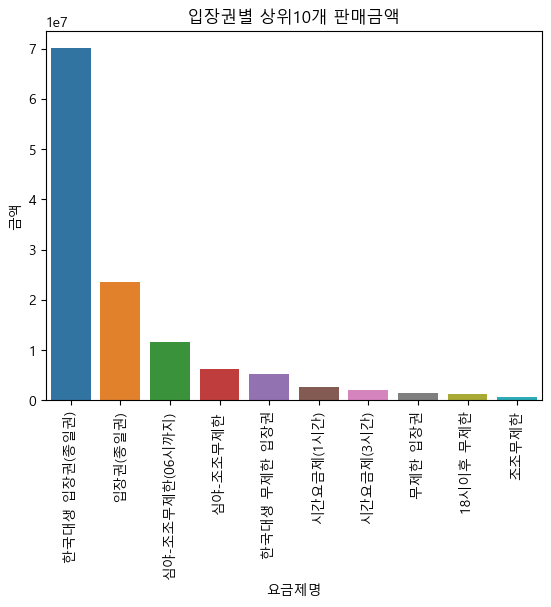

In [18]:
# 집계 결과 시각화하기
sns.barplot(x=tickets['요금제명'],y=tickets['금액'])
plt.xticks(rotation =90)
plt.title('입장권별 상위10개 판매금액')
plt.show()

* **내가 정의한 문제 해결하기** 
> 단골 고객 대상으로 메뉴 개선  
>  * 단골 고객이 많이 주문한 음식/음료  
>  * 단골 고객이 한번만 주문한 음식/음료

* **내가 정의한 문제1 : 단골 고객이 많이 주문한 음식/음료(sales_data)**  
단골 고객 기준 : 지금까지 결제한 총 횟수가 많은 20명 선정    
단골 고객이 많이 주문한 음식.음료 10개 뽑아 시각화  

In [27]:
customer=sales_data['고객'].value_counts().sort_values(ascending=False)
#단골 고객 : 결제한 횟수 순으로 20명
regular = list(customer.nlargest(20).index)
#regular
mask = sales_data['고객'].isin(regular)

#단골 고객이 많이 주문한 음식/음료 10가지
top10 = sales_data[mask].groupby('상품명')[['판매수량','payment']].sum().sort_values(by='판매수량',ascending=True)
top10 = top10.nlargest(10,columns='판매수량')
top10

,판매수량,payment
상품명,,
계란추가,65,32500
김치볶음밥,63,315000
라면,53,212000
낙지볶음밥,30,165900
짜장라면,30,135000
새우볶음밥,23,115000
치즈감자튀김,16,88000
쿠키(초코칩),14,21000
감자튀김,14,63000


<AxesSubplot:xlabel='상품명', ylabel='판매수량'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '계란추가'),
  Text(1, 0, '김치볶음밥'),
  Text(2, 0, '라면'),
  Text(3, 0, '낙지볶음밥'),
  Text(4, 0, '짜장라면'),
  Text(5, 0, '새우볶음밥'),
  Text(6, 0, '치즈감자튀김'),
  Text(7, 0, '쿠키(초코칩)'),
  Text(8, 0, '감자튀김'),
  Text(9, 0, '치즈추가')])

Text(0.5, 1.0, '단골 고객이 선호하는 음식/음료 Top10')

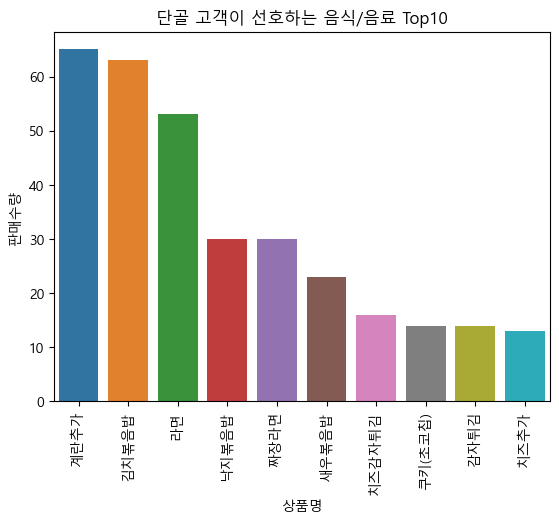

In [31]:
sns.barplot(x=top10.index, y=top10['판매수량'])
plt.xticks(rotation=90)
plt.title('단골 고객이 선호하는 음식/음료 Top10')

* **내가 정의한 문제1 : 단골 고객이 많이 주문한 음식/음료(sales_data)**  
단골 고객 기준 : 지금까지 결제 금액이 많은 20명 선정    
단골 고객이 주문한 판매 매출(판매개수X결제금액)이 높은 음식.음료 10개 뽑아 시각화  

In [40]:
#단골 고객 : 결제 금액 순으로 20명
customer = sales_data.groupby('고객')['payment'].sum().sort_values(ascending=False)
regular = list(customer.nlargest(20).index)
mask = sales_data['고객'].isin(regular)

# payment가 높은 순으로 10개 선정
top10 = sales_data[mask].groupby('상품명')[['판매수량','payment']].sum().sort_values(by='payment',ascending=False)
top10=top10.nlargest(10,columns='payment')
top10

,판매수량,payment
상품명,,
김치볶음밥,64,320000
라면,60,240000
낙지볶음밥,32,176900
짜장라면,30,135000
치즈감자튀김,17,93500
새우볶음밥,15,75000
치즈불고기볶음밥,12,66000
감자튀김,14,63000
치즈케이크,12,48000


<AxesSubplot:xlabel='상품명', ylabel='payment'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '김치볶음밥'),
  Text(1, 0, '라면'),
  Text(2, 0, '낙지볶음밥'),
  Text(3, 0, '짜장라면'),
  Text(4, 0, '치즈감자튀김'),
  Text(5, 0, '새우볶음밥'),
  Text(6, 0, '치즈불고기볶음밥'),
  Text(7, 0, '감자튀김'),
  Text(8, 0, '치즈케이크'),
  Text(9, 0, '한돈간장불고기덮밥')])

Text(0.5, 1.0, '단골 고객이 선호하는 음식/음료 판매금액 Top10')

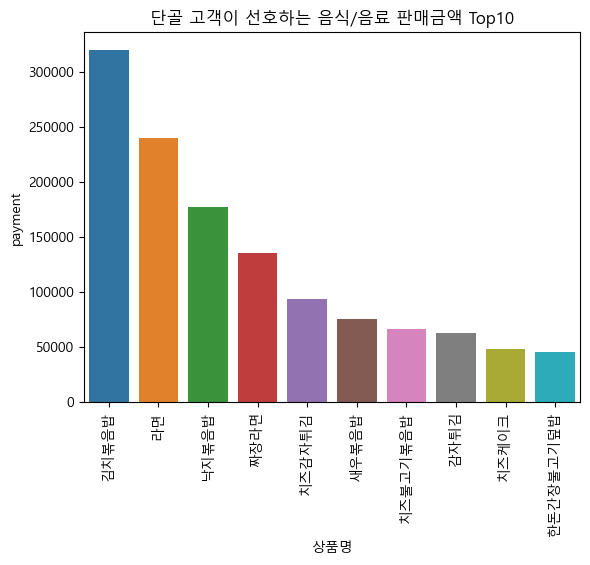

In [42]:
sns.barplot(x=top10.index, y=top10['payment'])
plt.xticks(rotation=90)
plt.title('단골 고객이 선호하는 음식/음료 판매금액 Top10')

* **내가 정의한 문제2 : 단골 고객이 1번만 주문한 음식/음료(sales_data)**  
단골 고객 기준 : 지금까지 결제한 총 횟수가 많은 20명 선정    
단골 고객이 1번만 주문한 음식.음료 뽑아 시각화  

In [68]:
customer=sales_data['고객'].value_counts().sort_values(ascending=False)
regular = list(customer.nlargest(20).index)
#regular
mask1 = sales_data['고객'].isin(regular)

temp_var = sales_data[mask1].groupby('상품명')['판매수량'].count().sort_values(ascending=True)
down = temp_var[temp_var == 1]
pd_down = pd.DataFrame(down).reset_index()
pd_down
list(down.index)

,상품명,판매수량
0,딸기스무디,1
1,바닐라라떼(ICE),1
2,순살닭다리덮밥,1
3,민트초코칩쉐이크,1
4,치킨카라아케 10pc,1
5,만두,1
6,레몬차(HOT),1
7,치킨카라아케 6pc,1
8,샷추가,1
9,딸기라떼(ICE),1


['딸기스무디',
 '바닐라라떼(ICE)',
 '순살닭다리덮밥',
 '민트초코칩쉐이크',
 '치킨카라아케 10pc',
 '만두',
 '레몬차(HOT)',
 '치킨카라아케 6pc',
 '샷추가',
 '딸기라떼(ICE)',
 '블루베리머핀',
 '녹차(ICE)',
 '카모마일(HOT)',
 '카페라떼(HOT)',
 '카페모카(HOT)',
 '카페모카(ICE)',
 '쿠앤크쉐이크',
 '(밥)체다치즈추가',
 '녹차라떼(HOT)']

<AxesSubplot:xlabel='상품명'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '딸기스무디'),
  Text(1, 0, '바닐라라떼(ICE)'),
  Text(2, 0, '순살닭다리덮밥'),
  Text(3, 0, '민트초코칩쉐이크'),
  Text(4, 0, '치킨카라아케 10pc'),
  Text(5, 0, '만두'),
  Text(6, 0, '레몬차(HOT)'),
  Text(7, 0, '치킨카라아케 6pc'),
  Text(8, 0, '샷추가'),
  Text(9, 0, '딸기라떼(ICE)'),
  Text(10, 0, '블루베리머핀'),
  Text(11, 0, '녹차(ICE)'),
  Text(12, 0, '카모마일(HOT)'),
  Text(13, 0, '카페라떼(HOT)'),
  Text(14, 0, '카페모카(HOT)'),
  Text(15, 0, '카페모카(ICE)'),
  Text(16, 0, '쿠앤크쉐이크'),
  Text(17, 0, '(밥)체다치즈추가'),
  Text(18, 0, '녹차라떼(HOT)')])

Text(0.5, 1.0, '단골 고객이 선호하지 않은 음식/음료')

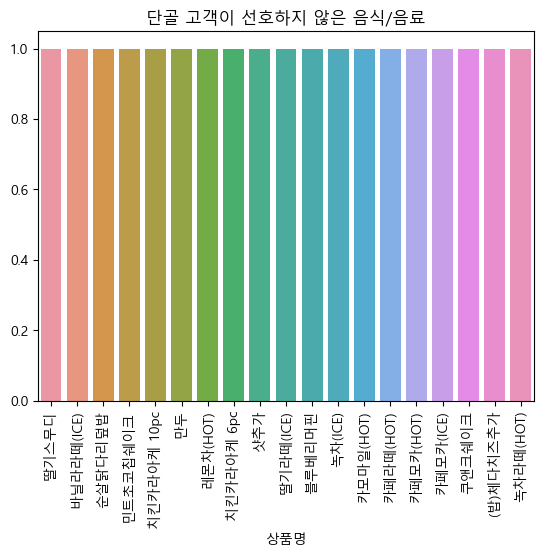

In [58]:
sns.barplot(x=down.index, y=down.values)
plt.xticks(rotation=90)
plt.title('단골 고객이 선호하지 않은 음식/음료')

## 4. 전략수립 및 실행 

### 4-1 주어진 필수 3문제 

* 월별 매출액 추세: 2021년 6월이 가장 높은 매출액을, 2021년 9월이 가장 낮은 매출액
* 가장 있기있는 음식/음료 : 김치볶음밥, 라면
* 가장 많이 팔린 입장권 종류 : 한국대생(종일권), 일반 입장권(종일권)

매출현황이 대학 학기 패턴을 따라가고 있음  
COVID-19에 따른 영업제한 조치   
앞으로 어떻게 해야 할까?  

### 4-2 내가 정의한 문제 해결

> 문제 정의 : 단골 고객 확보를 위해서 어떻게 해야 할까?  
>             단골 고객 대상으로 선호, 비선호 음식/음료를 조사하여 메뉴 개선 

* 단골 고객이 선호하는 음식(단골 고객이 많이 주문한 음식/음료) : 계란추가,김치볶음밥,라면 

* 단골 고객이 한번만 주문한 음식/음료(단골 고객이 선호하지 않는 음식) :   
 * 음료:  
'샷추가', '딸기스무디', '민트초코칩쉐이크','쿠앤크쉐이크','딸기라떼(ICE)','녹차(ICE)','바닐라라떼(ICE)','카페모카(ICE)','카모마일(HOT)','카페라떼(HOT)','카페모카(HOT)','레몬차(HOT)','녹차라떼(HOT)'
 * 음식:   
'블루베리머핀','순살닭다리덮밥','(밥)체다치즈추가','치킨카라아케 10pc','만두','치킨카라아케 6pc'

## 회고
* 주어진 데이터에서 문제를 정의하고 전략을 수립하는게 어려웠다
* 주어진 데이터에서 유의미한 정보를 알아내는 것이 어려웠다